In [1]:
import tensorflow as th
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras import Sequential

In [2]:
# [1] 시계열 데이터 y=0.5*sin(2x)-cos(x/2)정의

# 1000개 시계열 데이터
x=np.arange(0,100,0.1)
y=0.5*np.sin(2*x)-np.cos(x/2.0)

# RNN 입력에 필수적인(batch size, time steps, imput dim) 
# 3차원 텐서 형태의 입력 데이터로 쉽게 만들기 위해서 
# reshape(-1,1) 사용하여 (1000,1) 행렬로 바꾸어줌
seq_data=y.reshape(-1,1)

print(seq_data.reshape)
print(seq_data[:5])

<built-in method reshape of numpy.ndarray object at 0x0000028596CEA8D0>
[[-1.        ]
 [-0.89941559]
 [-0.80029499]
 [-0.70644984]
 [-0.62138853]]


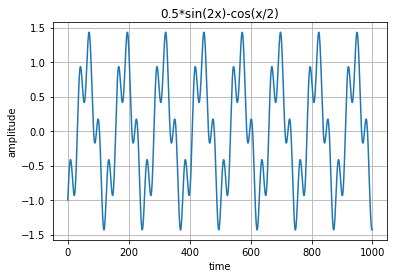

In [3]:
plt.grid()
plt.title('0.5*sin(2x)-cos(x/2)')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(seq_data)

plt.show()

In [4]:
def seq2dataset(seq, window, horizon):
    
    X=[]
    Y=[]
    
    for i in range(len(seq)-(window+horizon)+1):
        
        x=seq[i:(i+window)] # 슬라이싱 이용하여 [[],[],...] 형상으로 x 데이터 생성
        y=(seq[i+window+horizon-1])
        
        X.append(x)
        Y.append(y)
        
    return np.array(X), np.array(Y) 
    # x.shape=[[],[],...]는 2차원행렬
    # np.array(X) 통해서 (batch size, time steps, imput dims)형상을 가지는 
    # 3차원 텡서로 변환되어 리턴

In [5]:
# [2] 입력 데이터 x, 정답 데이터 y 생성

w=20 # window size
h=1 #horizon factor

# 시계열 데이터 seq_data로부터, w, h에 맞게 RNN 입력 데이터 X, 정답 데이터 Y 생성
# 이때 리턴되는 입력 데이터는 x.shape=(batch size, time steps, imput dims)
X,Y=seq2dataset(seq_data, w, h)

print(X.shape, Y.shape)

(980, 20, 1) (980, 1)


In [6]:
# [3] 트레이닝 데이터/테스트 데이터 분리

split_ratio=0.8

split=int(split_ratio*len(X))

x_train=X[0:split]
y_train=Y[0:split]

x_test=X[split:]
y_test=Y[split:]

print(x_train.shape, y_train.shape,
     x_test.shape, y_test.shape)

(784, 20, 1) (784, 1) (196, 20, 1) (196, 1)


In [7]:
# [4] SimpleRNN 모델 구축

model=Sequential()

model.add(SimpleRNN(units=128,
                   activation='tanh',
                   input_shape=x_train[0].shape))

model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               16640     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [9]:
# [5] 모델학습(EarlyStop 적용)

from tensorflow.keras.callbacks import EarlyStopping

early_stop=EarlyStopping(monitor='val_loss', patience=5)

model.fit(x_train, y_train,
         validation_data=(x_test, y_test),
         epochs=100, batch_size=16,
         callbacks=[early_stop])

Epoch 1/100
49/49 [==============================] - 1s 9ms/step - loss: 0.0377 - mae: 0.1231 - val_loss: 0.0018 - val_mae: 0.0366
Epoch 2/100
49/49 [==============================] - 0s 4ms/step - loss: 0.0013 - mae: 0.0284 - val_loss: 6.9196e-04 - val_mae: 0.0217
Epoch 3/100
49/49 [==============================] - 0s 4ms/step - loss: 5.5242e-04 - mae: 0.0187 - val_loss: 4.0560e-04 - val_mae: 0.0173
Epoch 4/100
49/49 [==============================] - 0s 4ms/step - loss: 3.4145e-04 - mae: 0.0147 - val_loss: 3.5270e-04 - val_mae: 0.0153
Epoch 5/100
49/49 [==============================] - 0s 4ms/step - loss: 3.8392e-04 - mae: 0.0160 - val_loss: 2.0320e-04 - val_mae: 0.0115
Epoch 6/100
49/49 [==============================] - 0s 4ms/step - loss: 2.7833e-04 - mae: 0.0135 - val_loss: 1.5094e-04 - val_mae: 0.0103
Epoch 7/100
49/49 [==============================] - 0s 4ms/step - loss: 1.4601e-04 - mae: 0.0096 - val_loss: 7.5569e-05 - val_mae: 0.0072
Epoch 8/100
49/49 [====================

In [10]:
from datetime import datetime

start_time=datetime.now()
hist=model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))
end_time=datetime.now()

print('Elapsed Time => ', end_time-start_time)

Epoch 1/100
25/25 [==============================] - 1s 7ms/step - loss: 4.7460e-05 - mae: 0.0055 - val_loss: 2.1458e-05 - val_mae: 0.0038
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 1.8652e-05 - mae: 0.0034 - val_loss: 8.2571e-06 - val_mae: 0.0022
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 1.0305e-05 - mae: 0.0026 - val_loss: 8.3457e-06 - val_mae: 0.0023
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 9.8070e-06 - mae: 0.0026 - val_loss: 1.4846e-05 - val_mae: 0.0032
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 1.1557e-05 - mae: 0.0027 - val_loss: 9.6523e-06 - val_mae: 0.0026
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 1.3477e-05 - mae: 0.0029 - val_loss: 1.4452e-05 - val_mae: 0.0031
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 1.6192e-05 - mae: 0.0032 - val_loss: 1.2694e-05 - val_mae: 0.0030
Epoch 8/100
25/25 [========

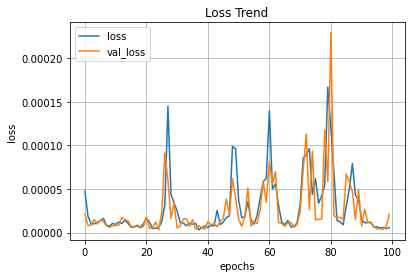

In [11]:
plt.title('Loss Trend')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.legend(loc='best')

plt.show()

In [12]:
pred=model.predict(x_test)
print(pred.shape)

7/7 [==============================] - 0s 2ms/step
(196, 1)


In [13]:
rand_idx=np.random.randint(0, len(y_test), size=5)
print('random idx = ', rand_idx, '\n')
print('pred = ', pred.flatten()[rand_idx])
print('label = ', y_test.flatten()[rand_idx])

random idx =  [120  42  82  96 109] 

pred =  [ 0.86275685 -0.10019162 -0.4748731  -0.93523204  0.2855974 ]
label =  [ 0.8657532  -0.10441169 -0.47228505 -0.92589831  0.28575077]


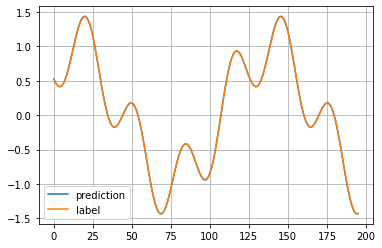

In [14]:
plt.plot(pred, label='prediction')
plt.plot(y_test,label='label')
plt.grid()
plt.legend(loc='best')

plt.show()